<center><h1> Flight Fare Prediction </h1></center>

![alt text](flight_banner.jpg "Title")

### Description

Guessing the flight prices can be very hard sometimes, today we might see a price but when we check out the same flight the price might be different. We might have often heard travelers saying that flight ticket prices are so unpredictable. Here we will be provided with different prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Source : https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

### Problem Statemtent

We will use these flight records to determine flight prices based on the different parameters.

### Data Description

Columns:

    Airline
    Date_of_Journey
    Source
    Destination
    Route
    Dep_Time
    Arrival_Time
    Duration
    Total_Stops
    Additional_Info
    Price

### Business objectives and constraints

1. The cost of a mis-classification can be high.
2. There is strict latency concerns.

### Importing Liabraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable

### Reading the Data from the Excel file

In [4]:
train_df = pd.read_excel("/content/Data_Train.xlsx")
train_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


### Exploratory Data Analysis (EDA)

In [5]:
# Total number of columns in the dataset
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
# Information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# To know more about the dataset
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
# To know more about the dataset (T = Transpose)
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [11]:
# Checking if there is some null values or not
train_df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# Checking if there is some null values or not
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
# Dropping NAN values
train_df.dropna(inplace = True)

In [14]:
# Duplicate values
train_df[train_df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [15]:
# Dropping duplicate values
train_df.drop_duplicates(keep='first',inplace=True)

In [16]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
train_df.shape

(10462, 11)

In [18]:
# Checking the additional informations
train_df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [19]:
# Checking the different Airlines
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [20]:
train_df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [21]:
# Checking the different Airline Routes 
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [22]:
# Loading excel file for test dataset
test_df = pd.read_excel("Test_set.xlsx")
test_df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [23]:
# Total number of columns in the dataset
test_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [24]:
# Information about the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [25]:
# To know more about the dataset
test_df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [26]:
# To know more about the dataset (T = Transpose)
test_df.describe().T

,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


In [27]:
# Checking if there is some null values or not
test_df.isnull()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2666,False,False,False,False,False,False,False,False,False,False
2667,False,False,False,False,False,False,False,False,False,False
2668,False,False,False,False,False,False,False,False,False,False
2669,False,False,False,False,False,False,False,False,False,False


In [28]:
# Checking if there is some null values or not
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Data Visualization

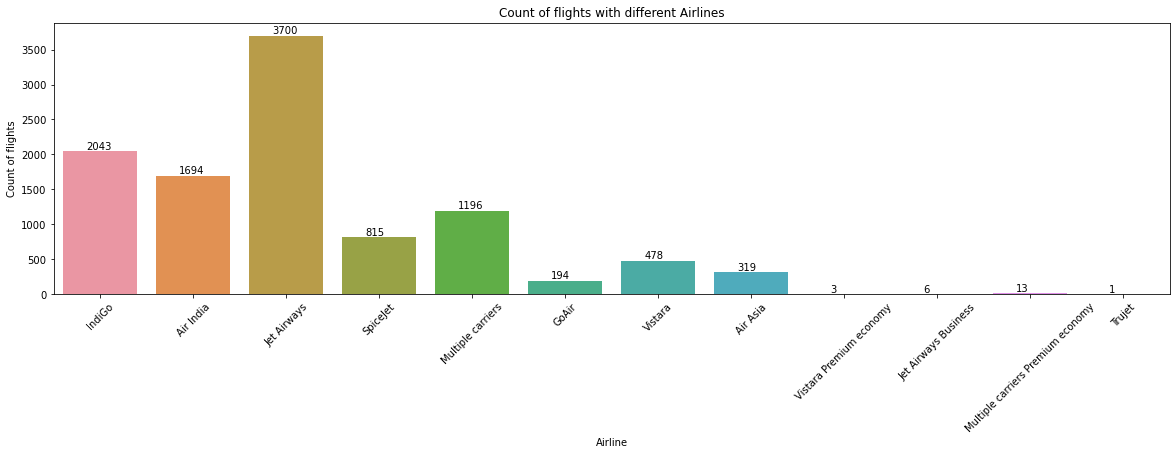

In [30]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

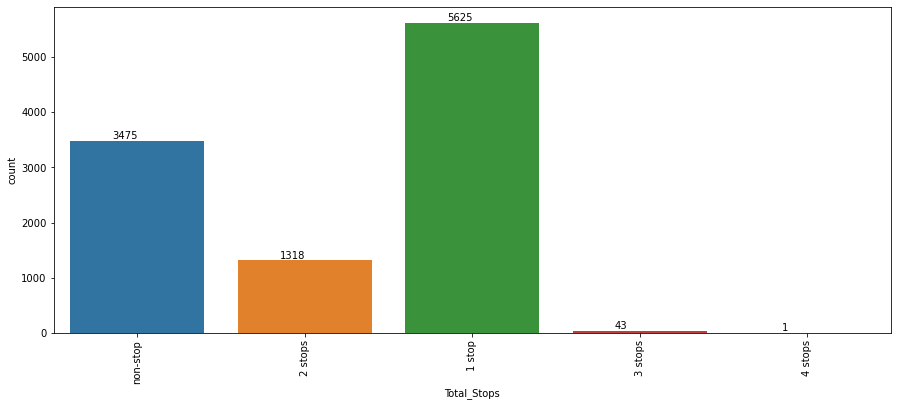

In [37]:
plt.figure(figsize = (15,6))
ax=sns.countplot(x = 'Total_Stops', data = train_df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

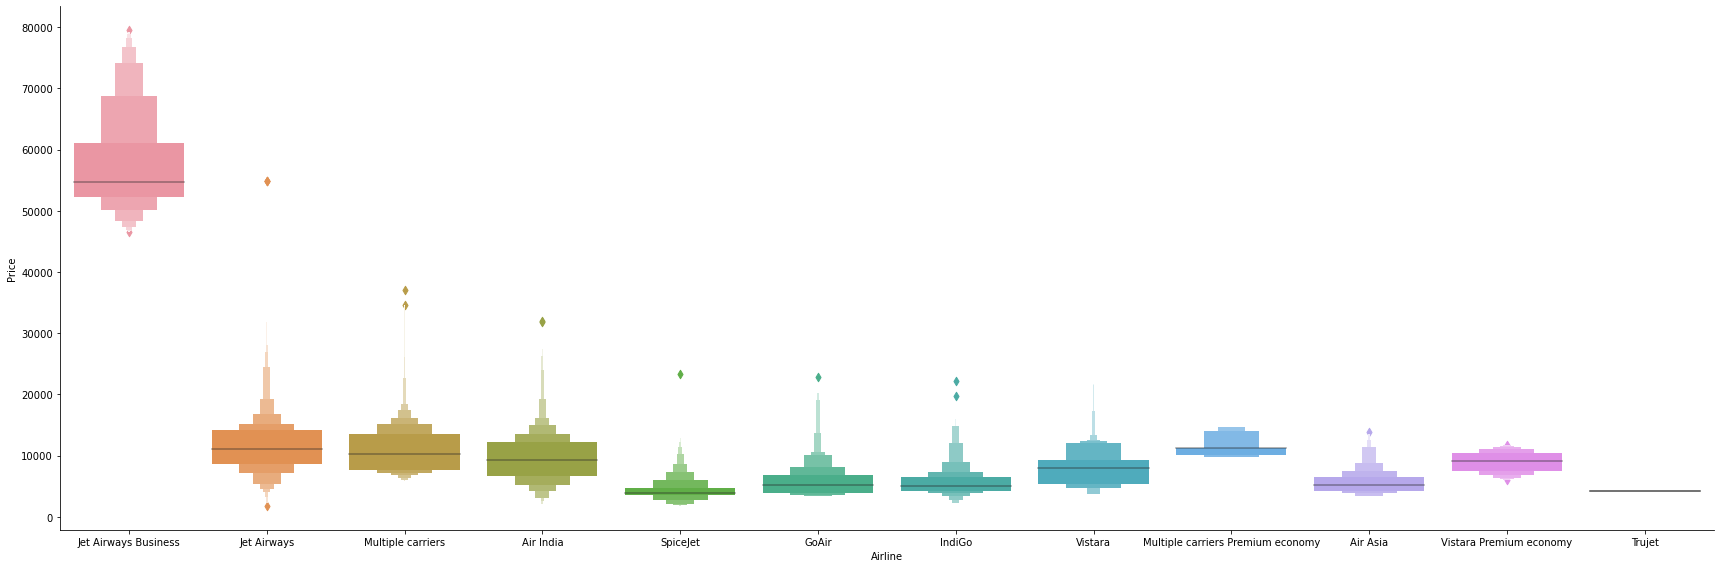

In [23]:
# Plotting Price vs Airline plot
sns.catplot(y = "Price", x = "Airline", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

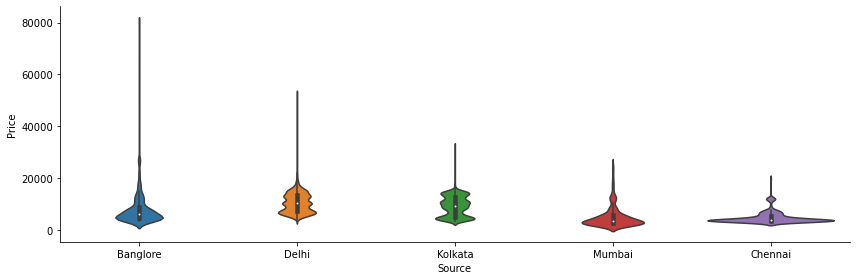

In [24]:
# Plotting Violin plot for Price vs Source
sns.catplot(y = "Price", x = "Source", data = train_df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

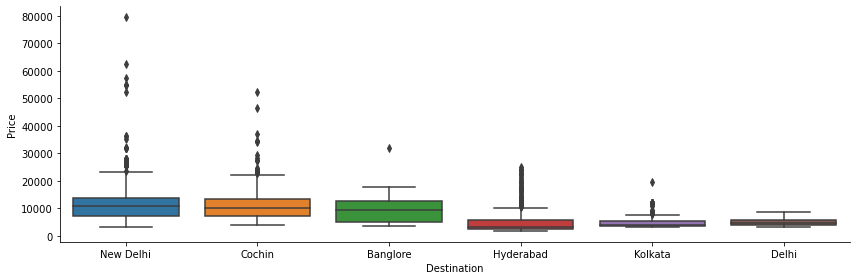

In [25]:
# Plotting Box plot for Price vs Destination
sns.catplot(y = "Price", x = "Destination", data = train_df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

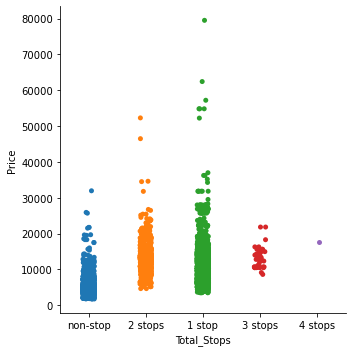

In [34]:
sns.catplot(x = 'Total_Stops', y = 'Price', data = train_df)
plt.show()

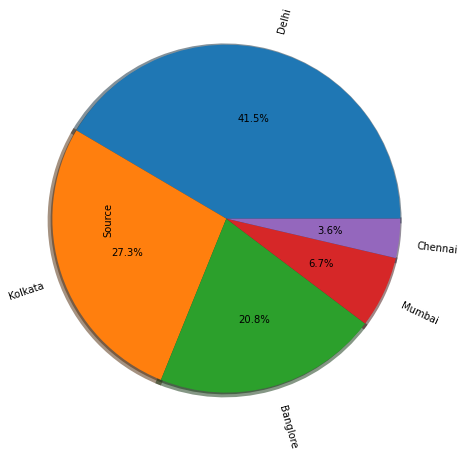

In [35]:
(train_df["Source"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

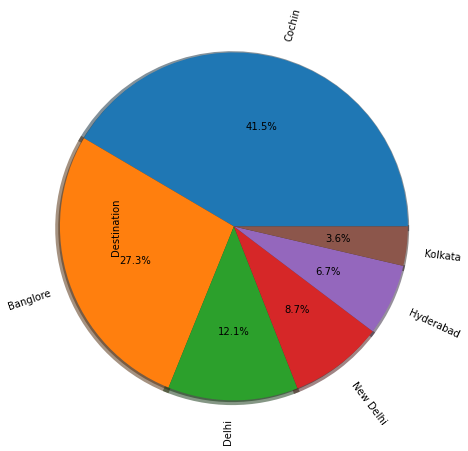

In [36]:
(train_df["Destination"].value_counts()).plot.pie(autopct="%.1f%%", shadow=True,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=2)
plt.show()

### Feature Engineering

In [26]:
# Dividing data into features and labels
# Duration convert hours in minutes

train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [27]:
# Date_of_Journey
train_df["Journey_day"] = train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df["Journey_month"] = train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
train_df["Dep_hour"] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df["Dep_Time"]).dt.minute
train_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
train_df["Arrival_hour"] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df["Arrival_min"] = pd.to_datetime(train_df.Arrival_Time).dt.minute
train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [28]:
# Date_of_Journey
test_df["Journey_day"] = test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df["Journey_month"] = test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_df["Dep_hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute
test_df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_df["Arrival_hour"] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df["Arrival_min"] = pd.to_datetime(test_df.Arrival_Time).dt.minute
test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

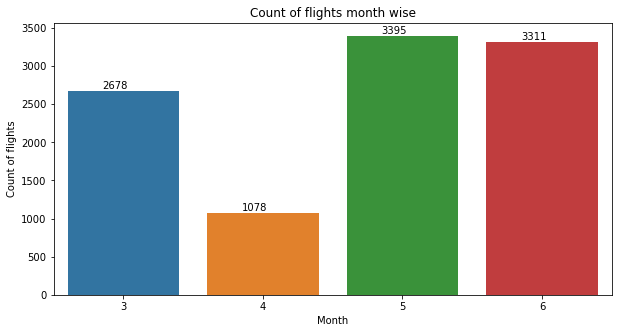

In [29]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

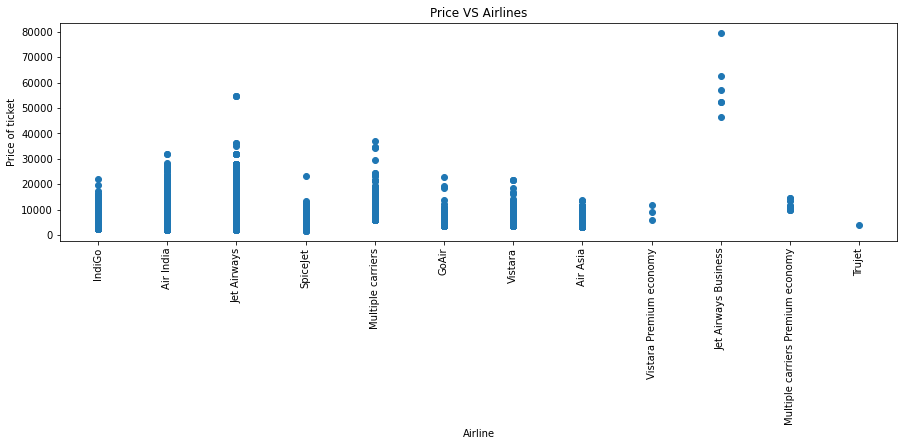

In [31]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [32]:
# Dropping the Price
data = train_df.drop(["Price"], axis=1)

### Correlation between all Features

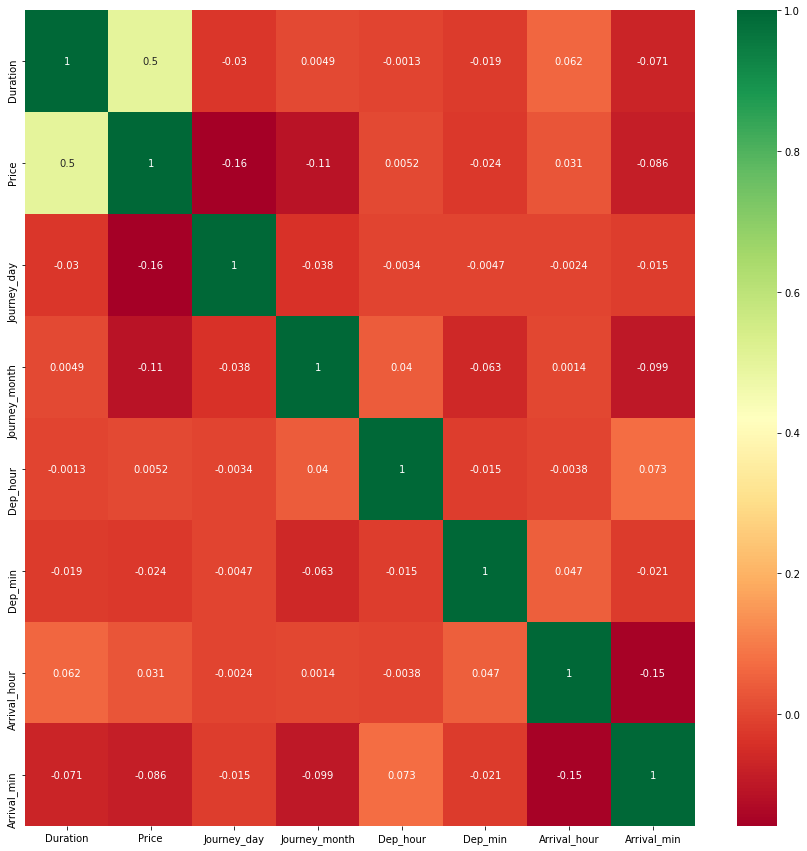

In [33]:
# Plotting Correation
plt.figure(figsize = (15,15))
sns.heatmap(train_df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [34]:
# Categorical Data and Numerical Data
train_categorical_data = data.select_dtypes(exclude=['int64', 'float','int32'])
train_numerical_data = data.select_dtypes(include=['int64', 'float','int32'])

test_categorical_data = test_df.select_dtypes(exclude=['int64', 'float','int32','int32'])
test_numerical_data  = test_df.select_dtypes(include=['int64', 'float','int32'])

In [35]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [36]:
# Label Encode and Hot Encode for Categorical Columns
le = LabelEncoder()
train_categorical_data = train_categorical_data.apply(LabelEncoder().fit_transform)
test_categorical_data = test_categorical_data.apply(LabelEncoder().fit_transform)

In [37]:
train_categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,3,0,5,18,4,8
1,1,3,0,84,1,8
2,4,2,1,118,1,8
3,3,3,0,91,0,8
4,3,0,5,29,0,8


In [38]:
# Concatenating both Catagorical Data and Numerical Data
X = pd.concat([train_categorical_data, train_numerical_data], axis=1)
y = train_df['Price']
test_set = pd.concat([test_categorical_data, test_numerical_data], axis=1)
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,18,4,8,170,24,3,22,20,1,10
1,1,3,0,84,1,8,445,1,5,5,50,13,15
2,4,2,1,118,1,8,1140,9,6,9,25,4,25
3,3,3,0,91,0,8,325,12,5,18,5,23,30
4,3,0,5,29,0,8,285,1,3,16,50,21,35


In [39]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [40]:
# Calculating Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Splitting the data into Train and Test

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [42]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7323, 13)
The size of training output is (7323,)
The size of testing input is (3139, 13)
The size of testing output is (3139,)


### Model Building

### 1. Ridge Regression

In [43]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [44]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [45]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  3558.667750232805
Mean Absolute % Error:  32
R-Squared:  0.4150529285926381


In [46]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3457.5985597925214
Mean Absolute % Error:  32
R-Squared:  0.42437171409958274


### 2. Lasso Regression

In [47]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [48]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [49]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  3560.853987663486
Mean Absolute % Error:  32
R-Squared:  0.4143339932536654


In [50]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3459.384927631988
Mean Absolute % Error:  32
R-Squared:  0.4237767638929625


### 3. Decision Tree Regression

In [51]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [52]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [53]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  853.5439415098682
Mean Absolute % Error:  6
R-Squared:  0.9663493502877083


In [54]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  1857.6805847504436
Mean Absolute % Error:  10
R-Squared:  0.8338367133860625


### 4. Random Forest Regression

In [55]:
# Performing GridSearchCV on Random Forest Regression
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [56]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [57]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
Root Mean Squared Error:  668.4110743826872
Mean Absolute % Error:  3
R-Squared:  0.9793638365415197


In [59]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  1510.2451897955793
Mean Absolute % Error:  8
R-Squared:  0.8901783633337156


### Comparing all the Models

In [72]:
# Training = Tr.
# Testing = Te.
x = PrettyTable()
x.field_names = ["Model Name", "Tr. RMSE", "Tr. MA%E", "Tr. R-Squared", "Te. RMSE", "Te. MA%E", "Te. R-Squared",]
x.add_row(['Ridge Regression','3558.67','32','0.42','3457.60','32','0.42'])
x.add_row([" ------------------------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "])
x.add_row(['Lasso Regression','3560.85','32','0.41','3459.38','32','0.42'])
x.add_row([" ------------------------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "])
x.add_row(['Decision Tree Regressor','853.54','06','0.97','1857.68','10','0.83'])
x.add_row([" ------------------------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "," ----------- "])
x.add_row(['Random Forest Regressor','668.41','03','0.98','1510.25','08','0.89'])
print(x)

+-----------------------------+---------------+---------------+---------------+---------------+---------------+---------------+
|          Model Name         |    Tr. RMSE   |    Tr. MA%E   | Tr. R-Squared |    Te. RMSE   |    Te. MA%E   | Te. R-Squared |
+-----------------------------+---------------+---------------+---------------+---------------+---------------+---------------+
|       Ridge Regression      |    3558.67    |       32      |      0.42     |    3457.60    |       32      |      0.42     |
|  -------------------------  |  -----------  |  -----------  |  -----------  |  -----------  |  -----------  |  -----------  |
|       Lasso Regression      |    3560.85    |       32      |      0.41     |    3459.38    |       32      |      0.42     |
|  -------------------------  |  -----------  |  -----------  |  -----------  |  -----------  |  -----------  |  -----------  |
|   Decision Tree Regressor   |     853.54    |       06      |      0.97     |    1857.68    |       10

### Conclusion

### By comparing all the models (Ridge Regression, Lasso Regression, Decision Tree Regressor, Random Forest Regressor), we can conclude that Decision Tree Regressor and Random Forest Regressor performs best.